# **PRAKTIKUM 2 - Bagaimana jika data non-linear?**

## **LANGKAH 0 - Import Library**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **LANGKAH 1 - membuat dataset Sintetis**

data diasumsikan akan berbentuk spiral untuk menyimulasikan kondisi non linear

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

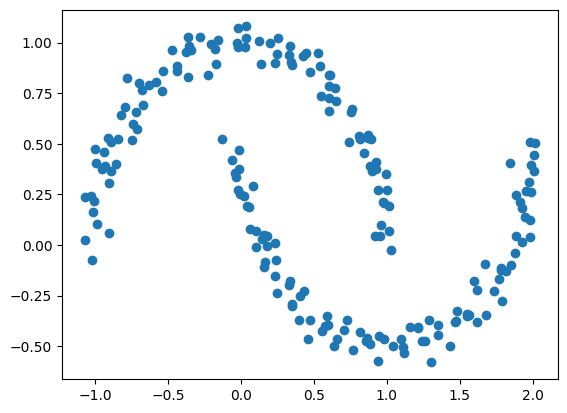

In [5]:
#plotting
plt.scatter(X[:, 0], X[:, 1])

## **LANGKAH 2 - Klasterisasi dengan K-Means**

Buat model KMeans dan lakukan plotting ulang hasil klasterisasi

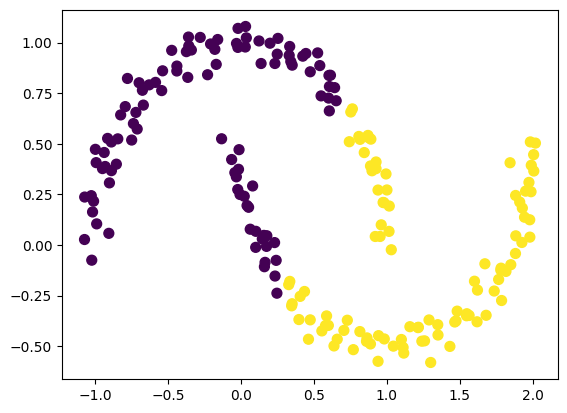

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0)
cluster = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

Evaluasi lebih lanjut dengan menggunakan silhouette coefficient.

In [7]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster))

0.49215648268306905


Nilai ini menunjukkan bahwa data tidak terklasterisasi dengan cukup baik.

## **LANGKAH 3 - Klasterisasi dengan DBSCAN**

Selannjutnya, melakukan klasterisasi dengan DBSCAN. DBSCAN sangat sensitif terhadap parameter epsilon dan minimal sampel!

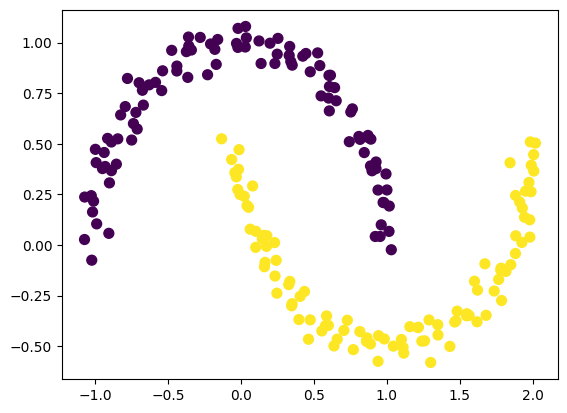

In [8]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

Berdasarkan scatterplot, data dapat terklasterisasi dengan sangat baik. Untuk memastikannya, kita perlu melakukan evaluasi kembali dengan silhouette score.

In [10]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster_db))

0.32585318950197517


Hasil silhouette score menunjukkan hasil yang tidak optimal. Padahal cluster terbentuk dengan baik secara visual. Mengapa demikian? Silhouette coefficient berasumsi cluster dapat terpisah dengan baik dalam bentuk linier, sehingga jika bentuknya distribusi data acak, evaluasi silhouette coefficient tidak dapat bekerja dengan baik. Maka ada evaluasi secara sederhana yang bisa kita lakukan,

1. Prosentase data noise
2. Inspeksi visual

secara metrik dapat menggunakan:

1. Davies-Bouldin Index (DBI) --> **fokus pada separasi indeks, semakin kecil semakin baik, rentang 0 hingga tak hingga.**

In [11]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

Davies-Bouldin Index: 1.1622685374061352
